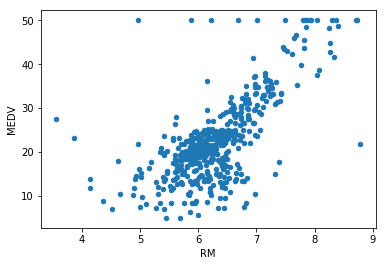

WITH DATA CLEANED: 


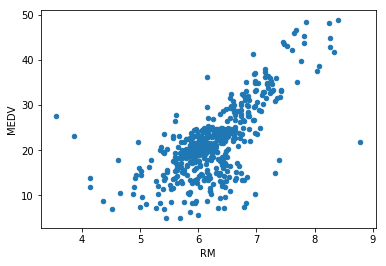

In [3]:
#Taylor Kramer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame


#data import

raw = sk.datasets.load_boston()
boston = DataFrame(raw.data, columns=raw.feature_names)
boston['MEDV'] = raw.target
boston.head

#lrs creation

lr = LinearRegression()
lr1 = LinearRegression()

#plot and create a hypothesis

boston.plot(kind='scatter', x='RM', y='MEDV')
plt.show()

###
#--->hypothesis: as the value of MEDV rises, the RM will rise as well; they have a fairly direct relationship
###

#fixing, cleaning up data

print('WITH DATA CLEANED: ')
boston = boston[boston['MEDV'] != 50.0]
boston.plot(kind='scatter', x='RM', y='MEDV')
plt.show()

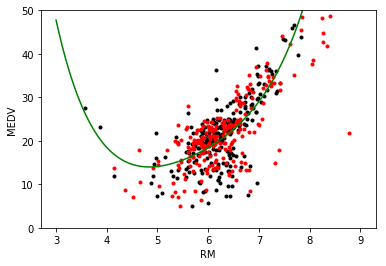

Score:  -0.03579419114665927


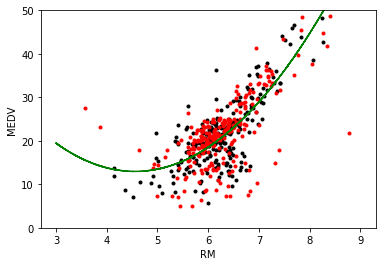

Score1:  0.4275055496405365


In [2]:
#features and sub-features 

def phi(X):
    matrix = np.array([X, X + 6, np.multiply(X, 3.5), X**8 + X**2 + 1, X**2, X**-0.5 -4]).T
    return matrix

def phi1(X):
    matrix = np.array([X, X + 6, X**2 + 3]).T
    return matrix

xdata = boston['RM']
ydata = boston['MEDV']

Phi = phi(xdata)
Phi1 = phi1(xdata)

X_train, X_test, y_train, y_test = train_test_split(
    Phi, ydata, test_size = 0.5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    Phi1, ydata, test_size = 0.5)

#using fit to train model

lr.fit(X_train, y_train)
lr1.fit(X_train1, y_train1)

#plotting results

x_model = np.arange(3, 9, 0.00001)
y_hat = lr.predict(phi(x_model))
plt.plot(X_train[:,0], y_train, 'k.', X_test[:,0], y_test, 'r.', x_model, y_hat, 'g-') 
plt.ylim(0,50)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()
print('Score: ', lr.score(X_test, y_test))

x_model1 = np.arange(3, 9, 0.00001)
y_hat1 = lr1.predict(phi1(x_model1))
plt.plot(X_train1[:,0], y_train1, 'k.', X_test1[:,0], y_test1, 'r.', x_model1, y_hat1, 'g-') 
plt.ylim(0,50)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()
print('Score1: ', lr1.score(X_test1, y_test1))


CONCLUSION:

Both of these models have inherent flaws as can be shown by the inconsistencies in their runs. The fluctuation can be rather large, the scores for both ranging between 0.35-0.65. Nonetheless, it would appear that although the first model is more consistently better than the second, every now and again the second model (model1) will have a better score than the original model which appears to be due to overfitting of the original model. 

Despite neither of these models being ideal for this data, there are some correlations which are made by each. The first model does appear to be more linear which follows the hypothesis of there being a direct correlation. The other model is less linear and therefore has no problem with trying to find more nonlinear patterns in the data although this, in turn, can sometimes result in less accurate predictions than the more linear model which looks more at the "big picture" of the data.

Based on these observations, it can only be said that it depends on the data and what one is looking for. Big picture or details? According to the scores, however, it would seem that more details can give more accurate results as long as overfitting does not occur.